We will determine how many collisions (on average) a molecule makes in travelling a distance $R$

Assuming that a molecule travels on average $r_{rms}$ between collisions

In [31]:
import random
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.style
print(matplotlib.style.available)
matplotlib.style.use('classic')

random.seed(None) # None means that the system will seed using system clock

def gen_2d_walk(jmax, ret_delta = False):
    jmax = jmax

    x_array = np.zeros(jmax + 1)
    y_array = np.zeros(jmax + 1)
    dx_array = np.zeros(jmax)
    dy_array = np.zeros(jmax)

    for i in range(jmax):
        dx_array[i] = (random.random() - 0.5)*2
        dy_array[i] = (random.random() - 0.5)*2
        L = sqrt(dx_array[i]**2 + dy_array[i]**2)
        x_array[i+1] = x_array[i] + dx_array[i]/L # the 1/L is the normalization factor
        y_array[i+1] = y_array[i] + dy_array[i]/L

    if ret_delta:
        return x_array, y_array, dx_array, dy_array
    else:
        return x_array, y_array


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


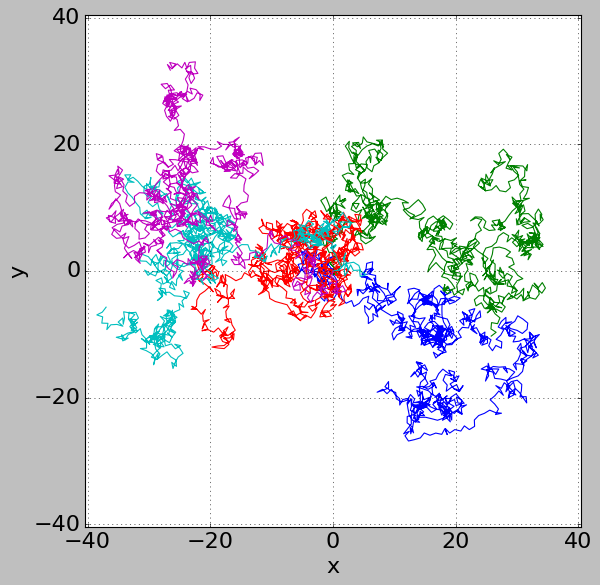

In [7]:
fig, ax = plt.subplots(figsize = (8,8))

max_val = 0
for i in range(5):
    x_walk, y_walk = gen_2d_walk(1000)
    max_val = np.max([max_val,np.max(np.abs(np.concatenate((x_walk, y_walk))))])
    ax.plot(x_walk, y_walk)

max_val = 1.05*max_val
ax.set_xlim((-max_val, max_val))
ax.set_ylim((-max_val, max_val))
ax.set_xlabel("x", fontsize = 20)
ax.set_ylabel("y", fontsize = 20)
ax.tick_params('both', labelsize = 20)
ax.grid(True)


Now we'll determine the $\left<R^2(N)\right> = \frac{1}{K}\sum_{k = 1}^K R^2_{(k)}(N)$

In [8]:
def R_squared(x_array, y_array):
    R_sq = x_array[-1]**2 + y_array[-1]**2

    return R_sq

In [14]:
def R_trials(N):
    K = int(round(sqrt(N)))
    avg = 0
    for i in range(K):
        x_array, y_array = gen_2d_walk(N)
        avg += (1/K)*R_squared(x_array, y_array)
    
    return avg

In [15]:
R_rms_sq = R_trials(100)
R_rms_sq

90.00476554805049

1
1876
3751
5626
7501
9376
11251
13126
15001
16876
18751
20626
22500
24375
26250
28125
30000
31875
33750
35625
37500
39375
41250
43125
45000


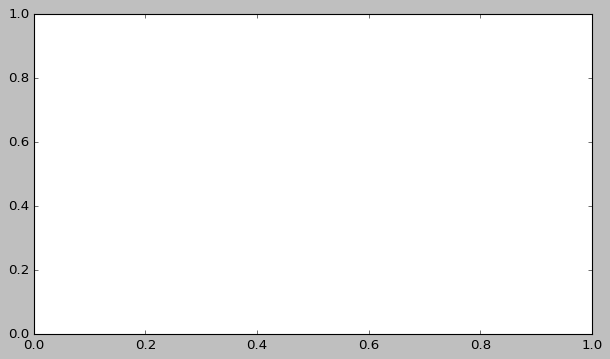

In [26]:
Ns = np.array(np.round(np.linspace(1,45000,25)), dtype = int)
sqrt_Ns = np.sqrt(Ns)
RvN = np.zeros(len(Ns))

for i in range(len(Ns)):
    print(Ns[i])
    RvN[i] = R_trials(Ns[i])


(1.0, 212.13203435596427)

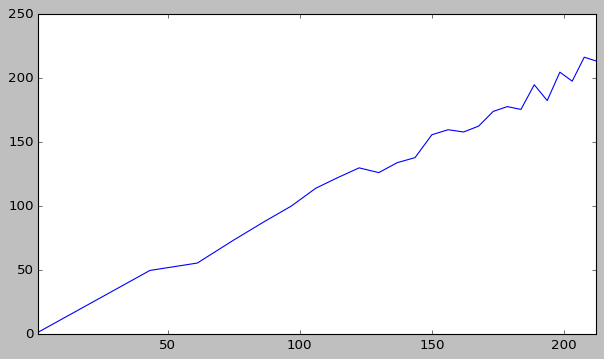

In [28]:
N_fig, N_ax = plt.subplots(figsize = (9,5))
N_ax.plot(sqrt_Ns,np.sqrt(RvN))
N_ax.set_xlim([sqrt_Ns[0], sqrt_Ns[-1]])

In [44]:
arr1 = np.array([1,2,3])
arr2 = []
np.concatenate([arr1,arr2])

array([1., 2., 3.])

In [45]:
# We'll then test for the randomness by modifying the function that we developed in Random_sequence.ipynb. I think I should start applying good coding practice.
def check_randomness(x_array, y_array = [], k=5):
    #print(x_array,y_array)
    merged_array = np.concatenate([x_array,y_array])
    N = len(merged_array)
    sum = 0
    for i in range(N):
        sum += (1/N)*merged_array[i]*merged_array[(i+k)%N]

    return sum



In [46]:
_ , _ , test_dx, test_dy = gen_2d_walk(1000, ret_delta=True)

print(check_randomness(test_dx, k = 3))
print(check_randomness(test_dx,test_dy))



0.0022273933517451853
0.002398894887598846
